In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [10]:
X,y = datasets.make_regression(n_samples = 100, n_features = 1, noise=20 ,random_state=42)
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

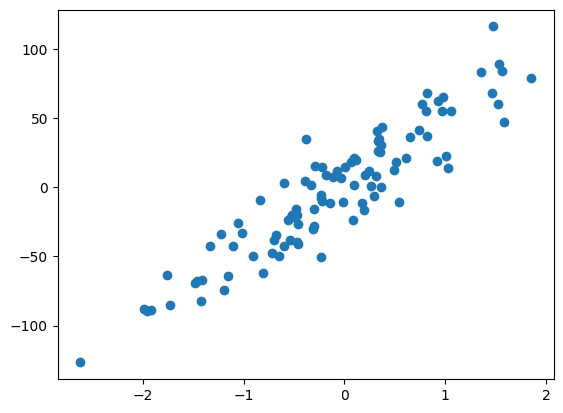

In [11]:
plt.scatter(X,y)

In [12]:
class LinearRegression:
    def __init__(self,lr=0.001,n_iters=10000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self,X,y):
        n_samples,n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        for _ in range(self.n_iters):
            y_pred = np.dot(X, self.weights) + self.bias

            dw = (1/n_samples) * np.dot(X.T, (y_pred-y))
            db = (1/n_samples) * np.sum(y_pred-y)

            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db

    def predict(self,X):
        y_pred = np.dot(X,self.weights) + self.bias
        return y_pred

In [13]:
model = LinearRegression()
model.fit(X_train,y_train)

In [ ]:
y_pred = model.predict(X_test)

def mse(y_test,y_pred):
    return np.mean((y_test-y_pred)**2)

mse = mse(y_test,y_pred)
print(mse)

417.01448356293696


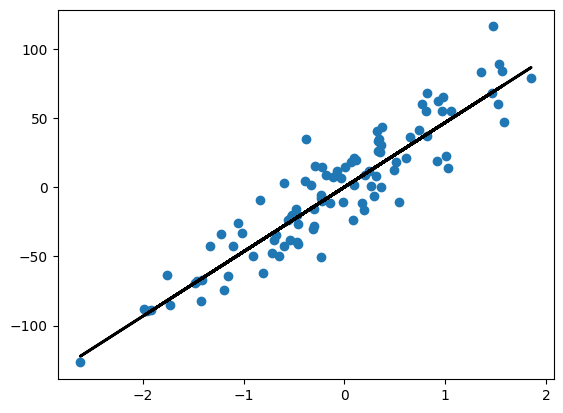

In [15]:
y_pred_line = model.predict(X)
plt.scatter(X,y)
plt.plot(X, y_pred_line, color='black', linewidth=2, label='Prediction')
plt.show()